In [1]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.3 MB/s 


In [ ]:
!pip install -q pandas-datareader

In [ ]:
!pip install -q --upgrade xlrd

In [ ]:
!pip install -q --upgrade pandas

In [ ]:
!pip install -q -U scikit-learn==0.23.2

In [ ]:
pip install -q tune-sklearn ray[tune]

In [ ]:
!pip install -q matplotlib==3.1.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.58 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
!pip install -q pandas-profiling==3.1.0

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q pycaret[full]

In [ ]:
!pip install -q BorutaShap

In [ ]:
!pip install -q lightgbm

In [ ]:
### Setting up libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr
import warnings
import joblib
from BorutaShap import BorutaShap, load_data
import lightgbm as ltb
from pycaret.utils import enable_colab
from pycaret.datasets import get_data
from pycaret.regression import *

# Yahoo Finance Config
yf.pdr_override()

# Pycaret Config
enable_colab()

Colab mode enabled.


In [ ]:
# Creating factor data
factors = ['mkt', 'size', 'qld', 'momnt', 'liq']

links = [
    'https://nefin.com.br/resources/risk_factors/Market_Factor.xls',
    'https://nefin.com.br/resources/risk_factors/SMB_Factor.xls',
    'https://nefin.com.br/resources/risk_factors/HML_Factor.xls',
    'https://nefin.com.br/resources/risk_factors/WML_Factor.xls',
    'https://nefin.com.br/resources/risk_factors/IML_Factor.xls',
  ]

factors = pd.DataFrame({'factor': factors, 'links': links})

# Loop to bind series into a dataframe
factors_df = pd.DataFrame()
for i in range(len(factors)):
  ret = pd.read_excel(factors['links'][i])  
  factors_df['%s' % factors['factor'][i]] = ret.iloc[:,-1:]

# adjust index
factors_df.index = pd.to_datetime(ret[['year', 'month', 'day']])



# Tickers of Global Indexes
assets = [
          '^VIX',       # Global Volatility Index
          '^TNX',       # Juros 10 anos EUA - BSHV39
          '^IRX',       # Juros 3 meses EUA - BSHV39
          'DX-Y.NYB',   # DXY
          '^GSPC',      # S&P 500 - IVVB11
          'EUR=X',      # USD vs EUR
          'IEV',        # Europa 350 - BIEV39
          'EWJ',        # Top ações Japão - BEWJ39
          'ACWX',       # MSCI - Top Ações mundo ordenado por Cap SEM USA
          'XWD.TO',     # MSCI - Top Ações mundo ordenado por Cap - BURT39
          'XEM.TO',     # MSCI - Ações Emergentes ordenado por Cap - BEEM39
          'EMB',        # USD Emerging Markets Bond
          'CNY=X',      # Remimbi Chines
          '000001.SS',  # Bolsa Chinesa
          'BRL=X',      # USD vs BRL
          'GD=F',       # GSCI ETF commodities - MATB11
          'CL=F',       # Oil
          'GC=F',       # Ouro - GOLD11
          'PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ELET3.SA', 'BBAS3.SA', 'MGLU3.SA', 
          'B3SA3.SA', 'PRIO3.SA', 'RENT3.SA', 'HAPV3.SA', 'GGBR4.SA', 'ABEV3.SA', 'LREN3.SA', 
          'JBSS3.SA', 'SUZB3.SA', 'WEGE3.SA', 'BPAC11.SA', 'AMER3.SA', 'CSNA3.SA', 'EQTL3.SA', 
          'NTCO3.SA', 'ITSA4.SA', 'VBBR3.SA', 'USIM5.SA', 'RAIL3.SA', 'VIIA3.SA', 'BRFS3.SA', 
          'RDOR3.SA', 'TOTS3.SA', 'RRRP3.SA', 'AZUL4.SA', 'HYPE3.SA', 'CSAN3.SA', 'RADL3.SA', 
          'SBSP3.SA', 'BBSE3.SA', 'PETZ3.SA', 'KLBN11.SA', 'MRFG3.SA', 'ASAI3.SA', 'CVCB3.SA', 
          'LWSA3.SA', 'CMIG4.SA', 'ENEV3.SA', 'MULT3.SA', 'CCRO3.SA', 'CPFE3.SA', 'CIEL3.SA', 
          'BRML3.SA', 'GOLL4.SA', 'EMBR3.SA', 'VIVT3.SA', 'GOAU4.SA', 'UGPA3.SA', 'SULA11.SA',
          'ALPA4.SA', 'TAEE11.SA', '^GSPC', 'ENGI11.SA', 'TIMS3.SA', 'BRKM5.SA', 'BEEF3.SA',
          'ARZZ3.SA', 'CYRE3.SA', 'XPBR31.SA', 'SANB11.SA', 'MRVE3.SA', 'COGN3.SA',
          'EGIE3.SA', 'CRFB3.SA', 'ENBR3.SA', 'CPLE6.SA', 'RAIZ4.SA', 'SMTO3.SA', 'SOMA3.SA',
          'IGTI11.SA', 'CBAV3.SA', 'CASH3.SA', 'YDUQ3.SA', 'PCAR3.SA', 'OIBR3.SA', 'MOVI3.SA',
          'AURE3.SA', 'IRBR3.SA', 'TRPL4.SA', 'MDIA3.SA', 'ENAT3.SA', 'DXCO3.SA', 'MEGA3.SA',
          'QUAL3.SA', 'VAMO3.SA', 'RECV3.SA', 'BPAN4.SA', 'INTB3.SA', 'CMIN3.SA', 'FLRY3.SA',
          'NEOE3.SA', 'ALSO3.SA', 'ALUP11.SA', 'EZTC3.SA', 'PSSA3.SA', 'DMMO3.SA', 'ECOR3.SA',
          'AMBP3.SA', 'LIGT3.SA', 'SBFG3.SA', 'SIMH3.SA', 'GMAT3.SA', 'STBP3.SA', 'SEQL3.SA',
          'UNIP6.SA', 'RAPT4.SA', 'MYPK3.SA', 'SAPR11.SA', 'VIVA3.SA', 'TUPY3.SA', 'LJQQ3.SA',
          'BRPR3.SA', 'BRSR6.SA', 'GGPS3.SA', 'JHSF3.SA', 'CSMG3.SA', 'SMFT3.SA', 'CXSE3.SA',
          'POSI3.SA', 'AGRO3.SA', 'DIRR3.SA', 'TEND3.SA', 'SQIA3.SA', 'AESB3.SA', 'CEAB3.SA',
          'TASA4.SA', 'ANIM3.SA', 'BKBR3.SA', 'ORVR3.SA', 'ESPA3.SA', 'CAML3.SA', 'FESA4.SA',
          'KEPL3.SA', 'TRAD3.SA', 'GRND3.SA', 'ETER3.SA', 'BLAU3.SA', 'AMAR3.SA', 'ODPV3.SA',
          'LOGN3.SA', 'HBSA3.SA', 'ONCO3.SA', 'GUAR3.SA', 'POMO4.SA', 'FHER3.SA', 'WIZS3.SA',
          'RANI3.SA', 'GFSA3.SA', 'AERI3.SA', 'BOAS3.SA', 'CURY3.SA', 'MILS3.SA', 'MLAS3.SA',
          'AALR3.SA', 'JALL3.SA', 'LOGG3.SA', 'TTEN3.SA', 'EVEN3.SA', 'LEVE3.SA', 'PNVL3.SA',
          'PARD3.SA', 'PGMN3.SA', 'CLSA3.SA', 'ARML3.SA', 'BMOB3.SA', 'TRIS3.SA', 'DASA3.SA',
          'PTBL3.SA', 'MODL11.SA', 'LAVV3.SA', 'IFCM3.SA', 'ROMI3.SA', 'PORT3.SA', 'MATD3.SA',
          'VULC3.SA', 'MBLY3.SA', 'DESK3.SA', 'MEAL3.SA', 'ENJU3.SA', 'SOJA3.SA', 'SEER3.SA',
          'TFCO4.SA', 'GETT11.SA', 'TGMA3.SA', 'FRAS3.SA', 'VITT3.SA', 'SYNE3.SA', 'LVTC3.SA',
          'VLID3.SA', 'JSLG3.SA', 'RCSL3.SA', 'VVEO3.SA', 'OPCT3.SA', 'FIQE3.SA', 'LUPA3.SA',
          'VIVR3.SA', 'ELMD3.SA', 'DEXP3.SA', 'NGRD3.SA', 'HBOR3.SA', 'MTRE3.SA', 'BRBI11.SA',
          'PLPL3.SA', 'LPSB3.SA', 'INEP3.SA', 'BMGB4.SA', 'APER3.SA', 'BRIT3.SA', 'CSED3.SA',
          'TECN3.SA', 'WEST3.SA', 'SHUL4.SA',  'LAND3.SA', 'SHOW3.SA', 'ALLD3.SA', 'TCSA3.SA',
          'NINJ3.SA', 'PDGR3.SA', 'KRSA3.SA', 'STOC31.SA', 'TPIS3.SA', 'PRNR3.SA', 'AZEV4.SA',
          'ALPK3.SA', 'MELK3.SA', 'PMAM3.SA', 'LLIS3.SA', 'RSID3.SA', 'COCE5.SA', 'RNEW4.SA',
          'DMVF3.SA', 'G2DI33.SA', 'EUCA4.SA', 'CGRA4.SA', 'CLSC4.SA', 'MOAR3.SA', 'CRPG5.SA',
          'CEBR6.SA', 'HBRE3.SA', 'OFSA3.SA', 'PDTC3.SA', 'SGPS3.SA', 'UCAS3.SA', 'DOTZ3.SA',
          'EMAE4.SA', 'PINE4.SA', 'BLUT4.SA'
          ]
assets.sort()

# Date Range
start = '2006-01-01'
end = factors_df.index[-1].strftime('%Y-%m-%d')

# Downloading data
data = pdr.get_data_yahoo(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))].droplevel(level=0, axis=1)

# Join both datasets into one
data = pd.concat([data.pct_change(), factors_df], axis = 1)

# Turn all values from lognormal to normal
final_data = np.log1p(data)

[*********************100%***********************]  271 of 271 completed


In [ ]:
# Get market potential predictors
factors = [
    '^TNX',         # Juros 10 anos EUA - BSHV39
    '^IRX',         # Juros 3 meses EUA - BSHV39
    'DX-Y.NYB',     # DXY
    '^VIX',         # Global Volatility Index
    '^GSPC',        # S&P 500 - IVVB11
    'EUR=X',        # USD vs EUR
    'IEV',          # Europa 350 - BIEV39
    'EWJ',          # Top ações Japão - BEWJ39
    'ACWX',       # MSCI - Top Ações mundo ordenado por Cap SEM USA
    'XWD.TO',       # MSCI - Top Ações mundo ordenado por Cap - BURT39
    'XEM.TO',       # MSCI - Ações Emergentes ordenado por Cap - BEEM39
    'EMB',          # USD Emerging Markets Bond
    'CNY=X',        # Remimbi Chines
    '000001.SS',    # Bolsa Chinesa
    'GD=F',         # GSCI ETF commodities - MATB11
    'CL=F',         # Oil
    'GC=F',         # Ouro - GOLD11
    'BRL=X',        # USD vs BRL
    'mkt',
    'size',
    'qld',
    'momnt',
    'liq'
]

# Create dataframe to save alpha and betas
final_data = pd.DataFrame()

# Run a linear regression to get alpha
for i in [x for x in assets if x not in factors]:

  # Select index by Ticker Name
  y = data[i].dropna()

  # Selecting factors
  # Make Sure X index equals to Y Index
  x = data[data.index.isin(y.index)][factors].dropna()
  
  # Make Sure Y index equals to X indes
  y = y[y.index.isin(x.index)]

  # Creates a unique dataframe
  df = pd.concat([y, x], axis = 1)

  # Rename the first column name
  df.rename(columns={df.columns[0]: "RET" }, inplace = True)

  # Append in initial dataframe
  final_data = final_data.append(df)


final_data.head(3)

,RET,^TNX,^IRX,DX-Y.NYB,^VIX,^GSPC,EUR=X,IEV,EWJ,ACWX,XWD.TO,XEM.TO,EMB,CNY=X,000001.SS,GD=F,CL=F,GC=F,BRL=X,mkt,size,qld,momnt,liq
2016-10-31,-0.059375,-0.005962,0.080586,0.001017,0.053737,-0.000122,-0.007674,-0.001048,0.000793,0.000982,0.003140,0.008977,0.001047,-0.000206,-0.001217,-0.022967,-0.037782,-0.003136,0.011942,0.006591,-0.003893,-0.004295,0.000189,-0.010828
2016-11-01,-0.008859,-0.007634,0.169492,-0.007618,0.087925,-0.006787,0.001033,-0.004459,-0.003959,-0.003926,-0.007705,-0.012811,-0.001024,-0.001297,0.007078,-0.001798,-0.004055,0.011718,-0.001530,-0.025070,-0.001421,0.002467,-0.017427,0.002277
2016-11-03,0.005028,0.007226,0.037681,-0.002464,0.142857,-0.004423,-0.003649,-0.002123,0.002400,-0.001243,-0.005121,0.000366,0.002632,-0.002838,0.008445,-0.008583,-0.014998,-0.003597,0.005409,-0.024593,0.002152,-0.007016,-0.000170,0.004614


In [ ]:
### Run a model optimization pipeline using Pycaret
###################################################

### Starting Experiment
st_exp = setup(
    
    # Default params
    session_id=123,
    silent=True,

    # Data configs
    data=final_data,
    train_size=0.7,
    target='RET',
    
    # Dealing with outliers
    remove_outliers=True,

    use_gpu=True

)

# Run Model Comparision
best_model = compare_models(
    exclude = ['catboost', 'et', 'rf', 'gbr'],
    sort = 'R2'
)

print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.0176,0.0011,0.0322,0.0972,0.0255,2.0340,4.929
xgboost,Extreme Gradient Boosting,0.0177,0.0011,0.0323,0.0949,0.0253,2.3779,1.019
lr,Linear Regression,0.0177,0.0011,0.0323,0.0944,0.0254,1.8977,0.197
br,Bayesian Ridge,0.0177,0.0011,0.0323,0.0944,0.0254,1.8965,0.451
ridge,Ridge Regression,0.0177,0.0011,0.0323,0.0943,0.0255,1.8574,0.113
lar,Least Angle Regression,0.0177,0.0011,0.0323,0.0943,0.0254,1.8758,0.099
dt,Decision Tree Regressor,0.0177,0.0011,0.0323,0.0936,0.0253,2.4967,2.286
omp,Orthogonal Matching Pursuit,0.0178,0.0011,0.0323,0.0928,0.0254,1.9309,0.097
huber,Huber Regressor,0.0176,0.0011,0.0323,0.0917,0.0258,1.8673,10.706
ada,AdaBoost Regressor,0.0186,0.0012,0.0340,0.0041,0.0265,2.0522,4.835


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
final_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0176,0.0010,0.0309,0.1044,0.0251,1.5582
1,0.0176,0.0008,0.0289,0.1134,0.0245,1.5018
2,0.0177,0.0010,0.0310,0.0991,0.0258,1.5355
3,0.0174,0.0008,0.0286,0.1118,0.0242,1.9943
4,0.0174,0.0008,0.0284,0.1174,0.0243,5.9392
5,0.0176,0.0023,0.0479,0.0440,0.0268,1.5199
6,0.0177,0.0010,0.0320,0.0969,0.0262,1.6104
7,0.0178,0.0010,0.0315,0.0936,0.0256,1.5643
8,0.0178,0.0011,0.0325,0.0912,0.0264,1.5560


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


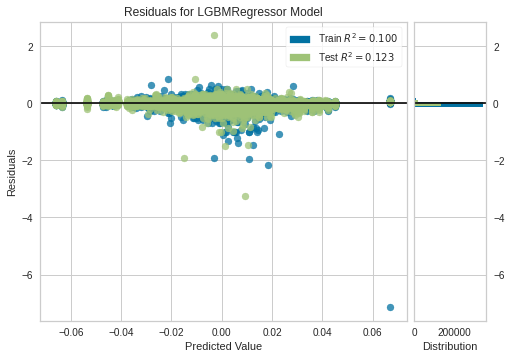

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(final_model, plot = 'residuals')

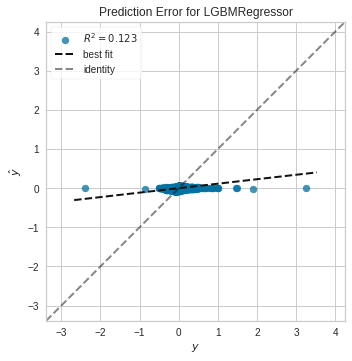

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(final_model, plot = 'error')

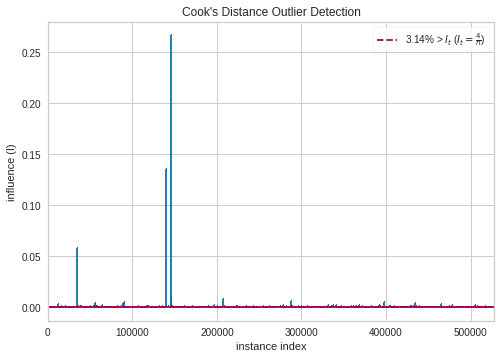

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(final_model, plot = 'cooks')

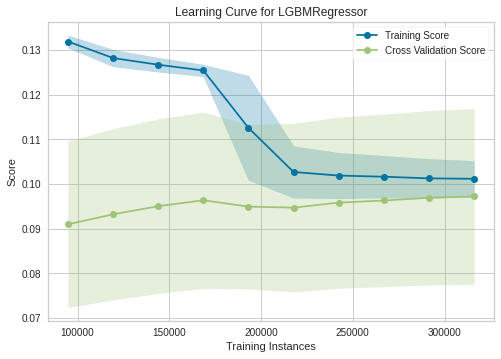

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(final_model, plot = 'learning')

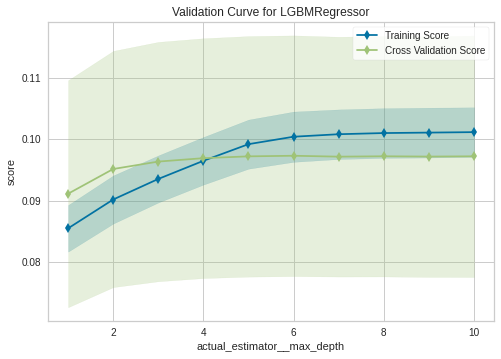

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(final_model, plot = 'vc')

In [ ]:
### Feature Selection with Boruta Shap

### Using lgbm because it is the fastest forest based model
model = ltb.LGBMRegressor()

x_vars = final_data.iloc[:, 1:]
y_var = final_data['RET']

# model selected default is Random Forest, if classification is False it is a Regression problem
Feature_Selector = BorutaShap(
    model=model,
    importance_measure='shap',
    classification=False,
    pvalue=0.05
)

Feature_Selector.fit(
    X=x_vars,
    y=y_var,
    n_trials=100,
    random_state=123,
    normalize=True
)

# Returns Boxplot of features
Feature_Selector.plot(
    X_size=12,
    figsize=(12,8),
    y_scale='log',
    which_features='all'
)

Feature_Selector.Subset().columns

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
# use automatically configured the lasso regression algorithm
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold

# define model
model = Lasso(
    alpha=0.000001,
    fit_intercept=True
)

# fit model
clf = model.fit(x_vars, y_var)

# Get Coefficients from Lasso Regression
coef = pd.DataFrame(
    {
        'features': pd.Series(x_vars.columns),
        'coef': pd.Series([clf.coef_[i] for i in range(len(clf.coef_))])
    }
)

# Get Intercept from Lasso Regression
interc = pd.DataFrame(
    {
        'features': 'intercept',
        'coef': [clf.intercept_]
    }
)

coef_lasso = interc.append(coef, ignore_index=True)

coef_lasso.sort_values(by=['coef'], inplace=True, ascending=False)

coef_lasso_final = coef_lasso[(coef_lasso.coef > 0)].reset_index(drop=True)

coef_lasso_final

In [ ]:
### Saving All relevant features from both algorithms
teste = pd.DataFrame(
    {
        'features': pd.Series(x_vars.columns),
        'boruta': '',
        'lasso': '',
    }
)

### Loop to test if feature is in Boruta or Lasso Selection
for i in teste.features:
    if i in Feature_Selector.Subset().columns.values:
        
        teste.boruta[int(teste[teste['features']==i].index.values)] = 'Sim'
    else:
        '-'
    
    if i in coef_lasso_final.features.values:
        
        teste.lasso[int(teste[teste['features']==i].index.values)] = 'Sim'
    else:
        '-'


teste[(teste.boruta == 'Sim') & (teste.lasso == 'Sim')]

In [ ]:
### Run a model optimization pipeline using Pycaret
###################################################

### Starting Experiment
st_exp = setup(
    
    # Default params
    session_id=123,
    silent=True,

    # Data configs
    data=final_data,
    train_size=0.7,
    target='RET',
    normalize=True,
    normalize_method='robust',
    
    # Dealing with outliers
    remove_outliers=True

)

# Run Model Comparision
best_model = compare_models(
    exclude = ['catboost', 'rf', 'gbr'],
    sort = 'R2'
)

print(best_model)